In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from textrank.textrank import KeywordSummarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [2]:
df = pd.read_csv("형태소추가.csv", encoding = 'cp949')
df.head()

,제목,저자,본문,출처,총길이,행 수,연 수,평균 단어 길이,평균 문장 길이,형태소
0,20년 후의 가을,곽재구,내 어릴 적 산골 학교 미술 시간에\n나는 푸른 크레용으로 옥토끼 모양 우리나라\n...,woorimal,705,28,1,3.385185,4.177778,내 어리 산골 학교 미술 시간 푸르 크레용 옥토끼 모양 우리나라 지도 그리 안 우거...
1,5월 화단,오일도,5월의 더딘 해 고요히 내리는 화단.\n하루의 정열도\n파김치 같이 시들다.\n바람...,raincat,95,6,2,0.555556,0.659259,더디 해 내리 화단 하루 정열 파김치 시들 바람 아 이파리 하나 흔들 힘 없 어둡 ...
2,5월이 오면,김용호,무언가 속을 흐르는게 있다.\n가느다란 여울이 되어\n흐르는 것.\n\n이윽고 그것...,raincat,194,14,4,1.185185,1.318519,무언가 속 흐르 있 가느다랗 여울 되 흐르 흐름 멈추 모이 호수 되 아담 정 부드럽...
3,6월의 시,김남조,어쩌면 미소짓는 물여울처럼 \n부는 바람일까 \n보리가 익어가는 보리밭 언저리에 \...,raincat,279,18,5,1.570370,1.911111,미소 짓 물 여울 부 바람 보리 익 갈 보리밭 언저리 고맙 햇빛 기름 인양 하 깊 ...
4,가 정,박목월,지상에는\n아홉 켤레의 신발\n아니 현관에는 아니 들깐에는\n아니 어느 시인의 가정...,woorimal,351,33,5,2.170370,2.333333,지상 신발 알 현관 알 드 까 에 알 시인 가정 알 전등 켜지 문수 다르 아홉 켤레...


In [5]:
arr = df['본문'][0].replace('\n', '').split('.')

In [4]:
arr

['내 어릴 적 산골 학교 미술 시간에 나는 푸른 크레용으로 옥토끼 모양 우리나라 지도를 그려 놓고 그 안에 울긋불긋 우거진 단풍잎과 맑은 시내를 그렸었다',
 ' 산머루 향이 교실까지 날아들던 오후 사범 학교를 갓 졸업한 처녀 선생님은 내 그림을 보고 울으셨다',
 ' 가을 산꽃이 피고 해으름이 일고 그 가을내 나는 선생님의 눈물 방울과 같은 단풍잎과 맑은 시냇물 속에 뛰놀았지만 돌아서서 눈물을 훔치던 선생님의 뒷모습과 나를 쳐다보던 충혈된 눈동자를 잊을 수 없었다',
 ' 그래 단풍잎은 지고 세월은 가고 이제는 선생이 된 내 앞에서 아이들이 땀을 흘리며 그림을 그린다',
 ' 똑같은 얼굴 똑같은 슬픔의 푸른 크레용으로 둘러친 동강 난 내 땅 내 그리운 하늘 아이들은 평상의 얼굴로 반쪽의 땅 위에 단풍잎을 채우고 나는 충혈된 눈으로 아이들을 보았다',
 ' 눈을 뜨고 모른다며 살아온 날들이 가슴 후비는 날 가만히 손가락으로 그려 보는 내 땅 내 그리운 하늘 아래 나는 이제 무엇을 채울 것인가 내 손으로 그린 내 땅 안에 허름하게 시든 단풍잎 하나 떨구는 것을 거부하면서 끝내는 잊혀진 옛 선생님의 눈물마저 되살아나 동강 난 눈물 방울들이 산과 바다와 아이들의 웃는 얼굴을 뒤덮었다',
 '']

In [5]:
okt = Okt()

def okt_tokenizer(sentence):
    words = okt.pos(sentence)
    words = [word for word in words if word[1] in ['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb']]
    return words

summarizer = KeywordSummarizer(tokenize=okt_tokenizer, min_count=2, min_cooccurrence=1, window=2)
summarizer.summarize(arr, topk=20)

[(('내', 'Noun'), 2.7669713275490144),
 (('잎', 'Noun'), 1.6997052704108264),
 (('단풍', 'Noun'), 1.6341606156915307),
 (('선생님', 'Noun'), 1.5478992264101472),
 (('눈물', 'Noun'), 1.5291032490496166),
 (('땅', 'Noun'), 1.4680762783209076),
 (('아이', 'Noun'), 1.371535336338554),
 (('된', 'Verb'), 1.0194302134105593),
 (('얼굴', 'Noun'), 0.9973888912203458),
 (('푸른', 'Noun'), 0.8985303824386777),
 (('크레용', 'Noun'), 0.8924541541241843),
 (('그려', 'Verb'), 0.8588178741098048),
 (('날', 'Noun'), 0.8516208125796709),
 (('동강', 'Noun'), 0.8447163377817639),
 (('하늘', 'Noun'), 0.8416581419685264),
 (('나', 'Noun'), 0.8410879685375229),
 (('난', 'Noun'), 0.8297144750644925),
 (('이제', 'Noun'), 0.8284006015062093),
 (('방울', 'Noun'), 0.8212385444040902),
 (('것', 'Noun'), 0.8197499311282089)]

In [6]:
# tf-idf vectorization
tv = TfidfVectorizer(min_df = 20)
text_tv = tv.fit_transform(df['형태소']).todense()
text_tv = pd.DataFrame(text_tv, columns = tv.get_feature_names(), index = df.index)

text_tv.head()

,가난,가늘,가리,가볍,가슴,가시,가을,가지,강물,거리,...,혼자,황혼,흐르,흔들,흔들리,흘러가,흘르,흘리,흩어지,희망
0,0.0,0.0,0.0,0.0,0.079532,0.0,0.202944,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.122715,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.383731,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.207688,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.503506,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.214782,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


## Clustering

In [6]:
macro = df[['총길이', '행 수', '연 수', '평균 단어 길이', '평균 문장 길이']]
macro_df = pd.DataFrame(StandardScaler().fit_transform(macro), columns=macro.columns)

In [8]:
macro_df

,총길이,행 수,연 수,평균 단어 길이,평균 문장 길이
0,2.040536,1.199796,-1.036540,1.470980,1.415050
1,-0.752106,-0.805684,-0.621011,-0.771278,-0.693909
2,-0.298874,-0.076418,0.210048,-0.272346,-0.298757
3,0.090265,0.288214,0.625577,0.032883,0.056436
4,0.419888,1.655587,0.625577,0.508335,0.309511
...,...,...,...,...,...
1269,0.085687,0.379373,0.210048,0.126799,0.051996
1270,-0.033344,-0.076418,0.625577,-0.014076,-0.045682
1271,3.981650,4.299174,-0.621011,4.077164,3.648326
1272,0.136046,0.288214,0.210048,0.120930,0.105275


In [7]:
# 이상치 제거 함수 (1Q - 1.5*IQR, 3Q + 1.5*IQR 을 넘어가는 값을 가진 행을 제거)
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx


for column in macro_df.columns:
    outlier_idx = get_outlier(df=macro_df, column=column, weight=1.5)
    macro_df.drop(outlier_idx, axis=0, inplace=True)

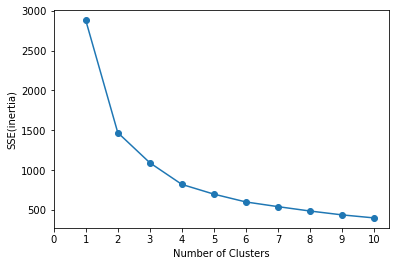

In [10]:
def elbow(X):
    sse = []
    for i in range(1,11):
        kmeans_elbow = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans_elbow.fit(X)
        sse.append(kmeans_elbow.inertia_)
        
    plt.plot(range(1,11), sse, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE(inertia)')
    plt.xticks(np.arange(11))
    
    plt.show()


elbow(macro_df)

For n_clusters = 2 The average silhouette_score is : 0.42040862775383764


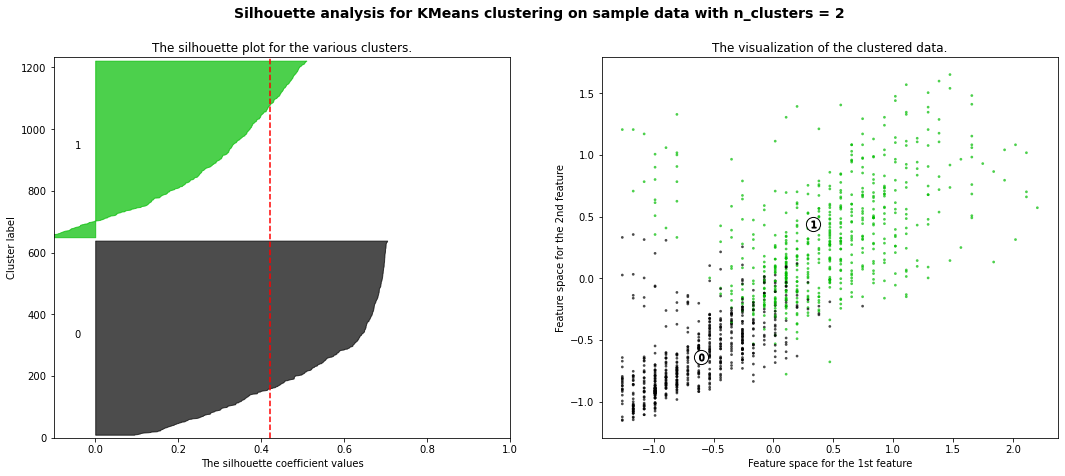

For n_clusters = 3 The average silhouette_score is : 0.4105597469581263


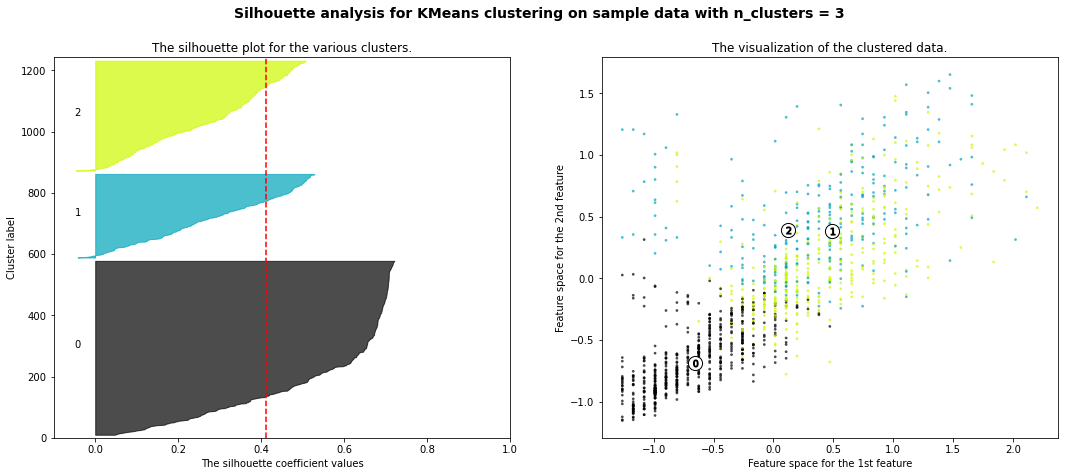

For n_clusters = 4 The average silhouette_score is : 0.3754271601369031


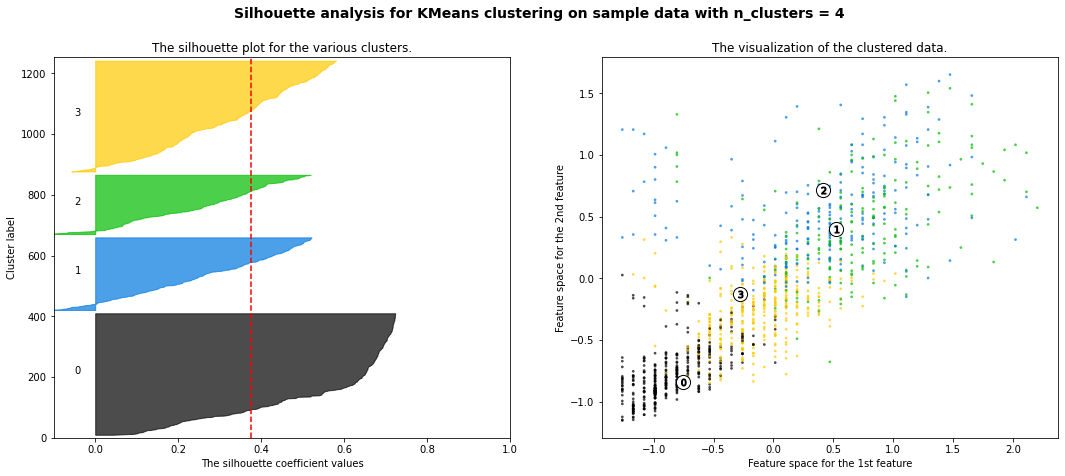

For n_clusters = 5 The average silhouette_score is : 0.3585958341854846


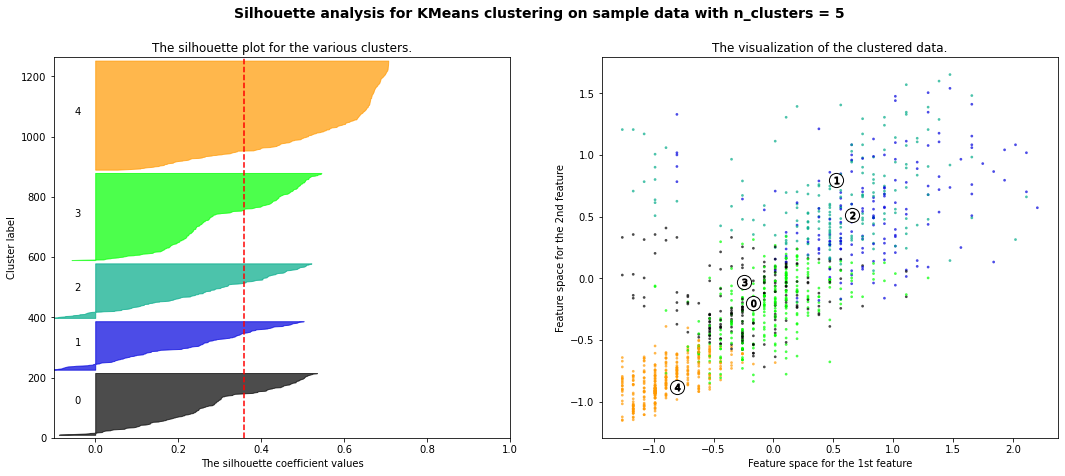

For n_clusters = 6 The average silhouette_score is : 0.3610462543228346


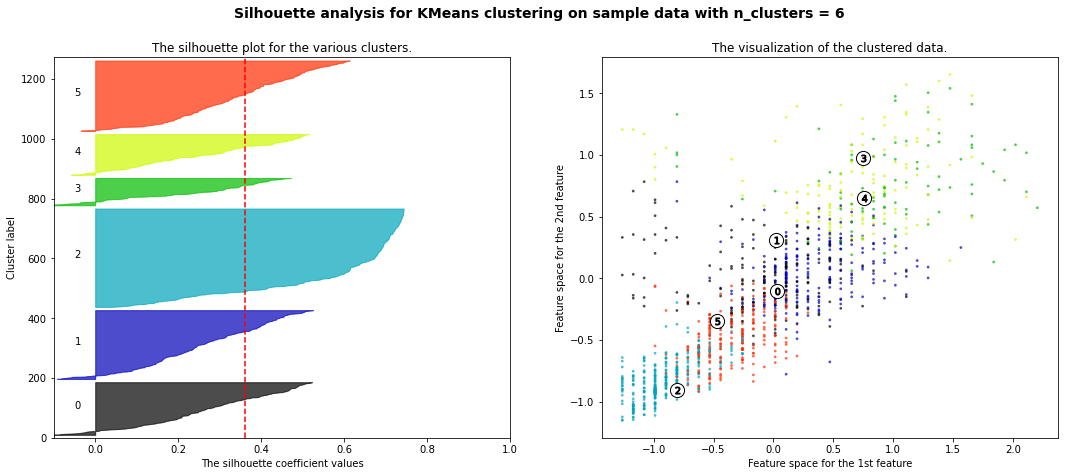

For n_clusters = 7 The average silhouette_score is : 0.35372751077703046


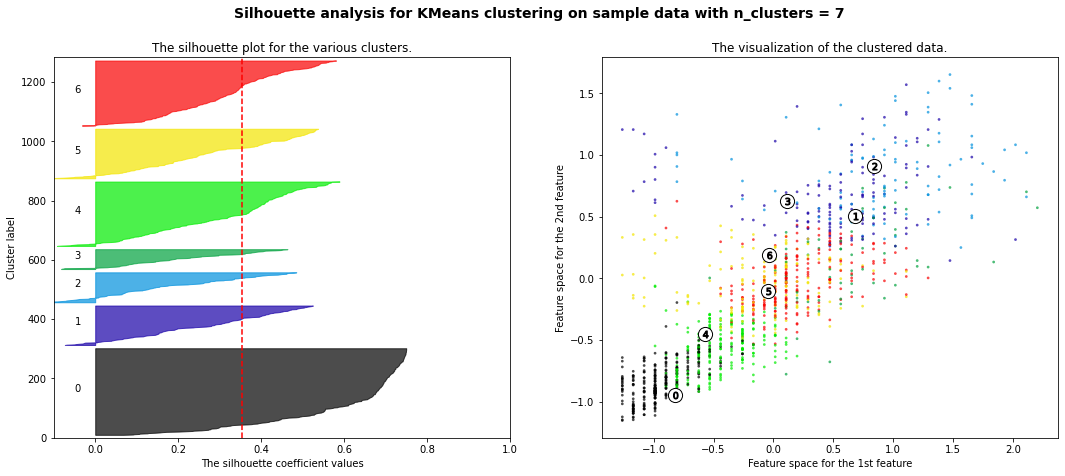

In [11]:
from __future__ import print_function
from sklearn.datasets import make_blobs
import matplotlib.cm as cm


for n_clusters in range(2, 8):
    fig, (ax1, ax2) = plt. subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1]) # 실루엣 계수 범위 지정
    ax1.set_ylim([0, len(macro_df) + (n_clusters+1) * 10]) # 실루엣 클러스터 사이의 공간 만들기
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(macro_df)
    
    silhouette_avg = silhouette_score(macro_df, kmeans_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(macro_df, kmeans_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmeans_labels == i]
            
        ith_cluster_silhouette_values.sort()
            
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
            
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # silhouette plots 각각 label 붙이기

        y_lower = y_upper + 10  # 다음 plot을 그리기위해 y_lower 새로 갱신
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x = silhouette_avg, color = "r", linestyle="--") # silhouette score 평균값 그리기
    

    # Cluster 보여주기 (2nd plot)
    colors = cm.nipy_spectral(kmeans_labels.astype(float) / n_clusters)
    ax2.scatter(macro_df.iloc[:, 1], macro_df.iloc[:, 3], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    kmeans_centers = kmeans.cluster_centers_ # cluster labeling
    ax2.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k') # centroid circle design

    for i, c in enumerate(kmeans_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

In [12]:
macro_df2 = macro_df.copy()

In [13]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(macro_df)

KMeans(n_clusters=6, random_state=42)

In [14]:
macro_df['군집 번호'] = model.predict(macro_df)

In [15]:
cluster_k = macro_df.groupby('군집 번호')
cluster_k.mean()

,총길이,행 수,연 수,평균 단어 길이,평균 문장 길이
군집 번호,,,,,
0,0.027128,-0.100109,-0.658573,0.021674,0.027213
1,0.024744,0.313865,0.888206,0.042513,-0.011123
2,-0.807348,-0.907063,-0.877884,-0.823963,-0.739600
3,0.745381,0.978837,1.628268,0.770817,0.648634
4,0.755025,0.649520,-0.399598,0.755423,0.694520
5,-0.474277,-0.342168,0.155466,-0.474331,-0.455301


In [16]:
k_score_samples = silhouette_samples(macro_df2, macro_df['군집 번호'])
macro_df['실루엣 계수'] = k_score_samples

k_average_score = silhouette_score(macro_df2, macro_df['군집 번호'])
print('데이터셋 Silhouette Analysis Score:{0:.3f}'.format(k_average_score))

데이터셋 Silhouette Analysis Score:0.361


In [17]:
macro_df.groupby('군집 번호')['실루엣 계수'].mean()

군집 번호
0    0.268867
1    0.258362
2    0.577844
3    0.219595
4    0.259018
5    0.341911
Name: 실루엣 계수, dtype: float64

In [18]:
macro_df

,총길이,행 수,연 수,평균 단어 길이,평균 문장 길이,군집 번호,실루엣 계수
1,-0.752106,-0.805684,-0.621011,-0.771278,-0.693909,2,0.550020
2,-0.298874,-0.076418,0.210048,-0.272346,-0.298757,5,0.432828
3,0.090265,0.288214,0.625577,0.032883,0.056436,1,0.427979
4,0.419888,1.655587,0.625577,0.508335,0.309511,3,0.019146
5,-0.637653,-0.441051,-1.036540,-0.648012,-0.596231,2,0.474859
...,...,...,...,...,...,...,...
1267,-0.449951,0.014740,-1.036540,-0.413221,-0.436394,0,0.096875
1268,-1.003901,-1.170317,-1.036540,-1.035418,-0.915904,2,0.692709
1269,0.085687,0.379373,0.210048,0.126799,0.051996,1,0.216318
1270,-0.033344,-0.076418,0.625577,-0.014076,-0.045682,1,0.210743
